### Module 5 Visualizing Data
### In-class exercises Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

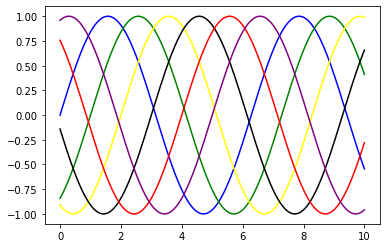

In [2]:
# Q.1
x = np.linspace(0,10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        
plt.plot(x, np.sin(x - 1), color='g')           
plt.plot(x, np.sin(x - 2), color='yellow')        
plt.plot(x, np.sin(x - 3), color='black')     
plt.plot(x, np.sin(x - 4), color="r") 
plt.plot(x, np.sin(x - 5), color='purple')

In [3]:
#Q.2(a)
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


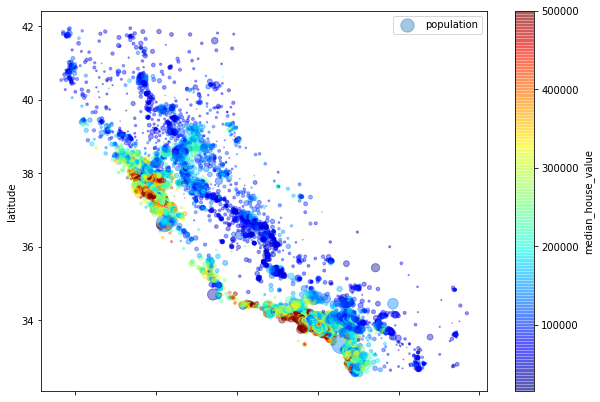

In [4]:
## we can use housing.plot() to make the plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# the "longitude" and "latitude" of each row is marked by a dot 
# alpha: extent of transparency. lower value means more transparent.
# s: size of the dot which shows the size of the population.
# figsize: set the size of the figure.
# c: color of the dot which shows the median house value.
# cmap: color map. We want to use the colormap "jet", but it is not the existing color map in the system.
# so, we use plt.get_cmap("jet") to assign cmap to be "jet"
# you can use exisiting color map in the system e.g., cmap = "viridis"
# we show colorbar in the figure


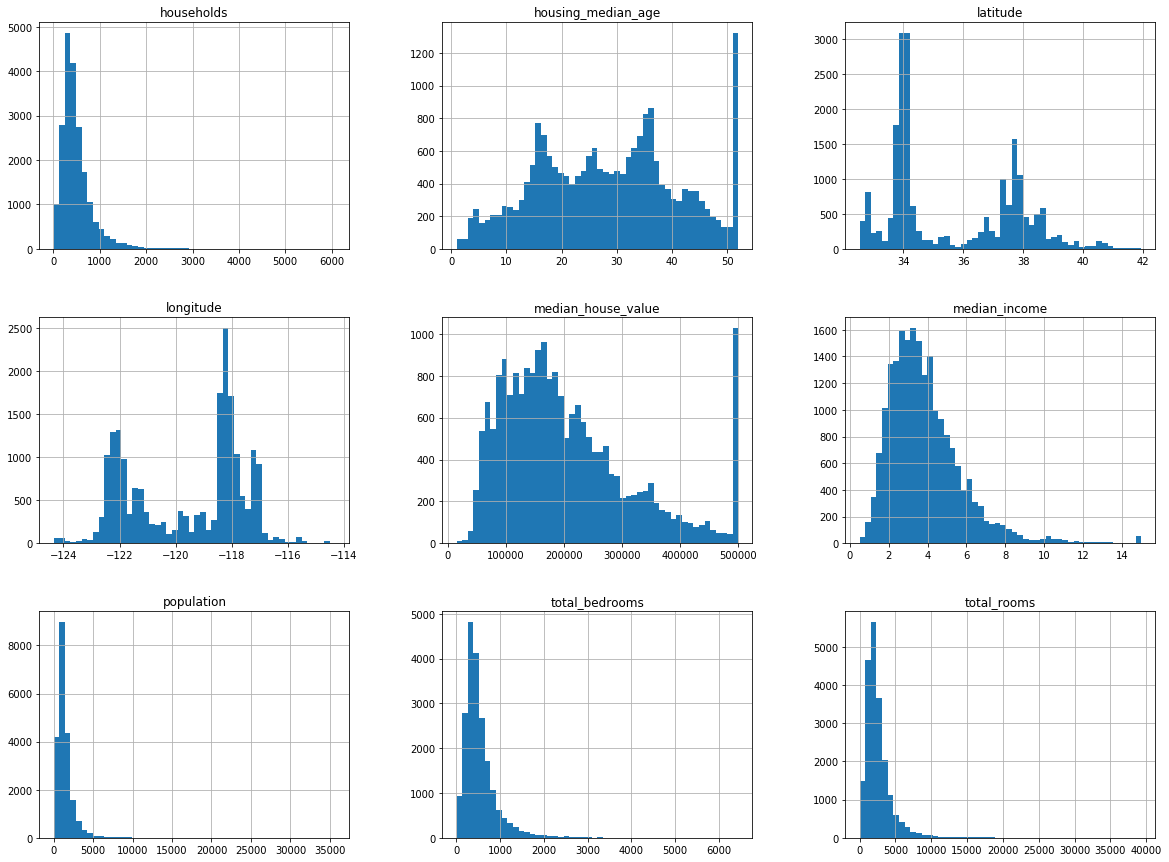

In [5]:
#Q.2(b)
# a very convenient way to plot histograms for all numeric columns.
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#Q.3 (a)
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
# load the dataset from sklean.datasets  (sklearn is an important module for machine learning)
# n_class= 6 (only 6 classes, the digits are 0, 1, 2, 3, 4, 5)

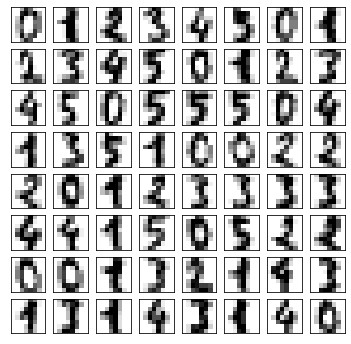

In [7]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

# use object-oriented interface there are 8x8 plots in the figure 
# all the plots are stored in ax
# for each plot, use imshow() to display the image
# we use an exisiting cmap = "binary"
# set ticks to be none for both x and y.

In [8]:
#3b
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)
# Isomap is a useful module for dimensionality reduction
# each digit was represented by 64 features
# we reduce each digit to only 2 features.
# we use fit_transform to run the module.

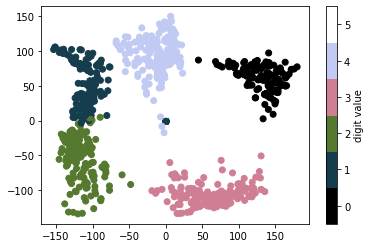

In [9]:
#3c
plt.scatter(x=projection[:, 0], y=projection[:, 1],
            c=digits.target, cmap=plt.get_cmap('cubehelix',6))
plt.colorbar(label='digit value')
plt.clim(-0.5, 5.5)

# a scatter plot with x being the first feature, y being the second feature.
# each color represents the class of the digit (either 0,1,2,3,4,5)
# cmap=plt.get_cmap('cubehelix',6), the color map has six clearly separated colors, not a continuum of colors.


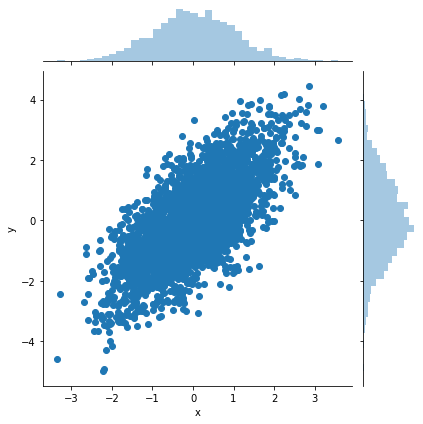

In [10]:
#Q.4
mean = [0, 0]
cov = [[1, 1], [1, 2]]

df = pd.DataFrame(np.random.multivariate_normal(mean, cov, 3000), columns=["x","y"])
sns.jointplot("x","y",df)
# sns.jointplot is very convenient.
# you need to type many lines of code if you just use matplotlib.pyplot

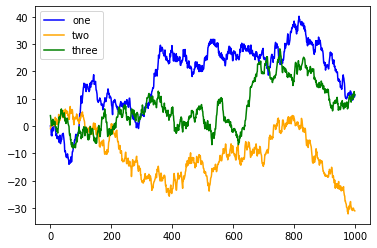

In [11]:
#Q.5

plt.plot(np.random.randn(1000).cumsum(), 'blue', label='one')
plt.plot(np.random.randn(1000).cumsum(), 'orange', label='two')
plt.plot(np.random.randn(1000).cumsum(), 'green', label='three')
plt.legend()

In [12]:
#Q.6

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A11397550>]],
      dtype=object)

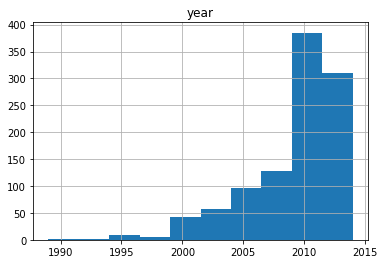

In [13]:
#Q.6a
# a simple way to do is plt.hist
planets.hist("year")

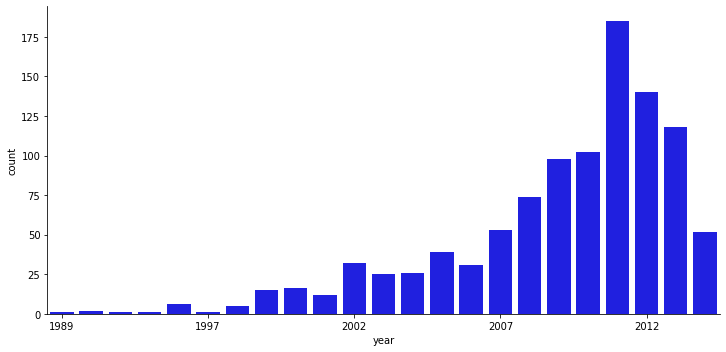

In [14]:
#Q.6a
# we can use seaborn to do the plot
g = sns.catplot("year", data=planets, kind="count", aspect=2, color="blue")
g.set_xticklabels(step=5)
# catplot is categorical plot. it is used for categorical values.
# kind = "count", count the number of rows for each year.
# aspect = 2, height:width = 1:2
# set_xticklabels(step=5), steps of 5 on the x-axis.

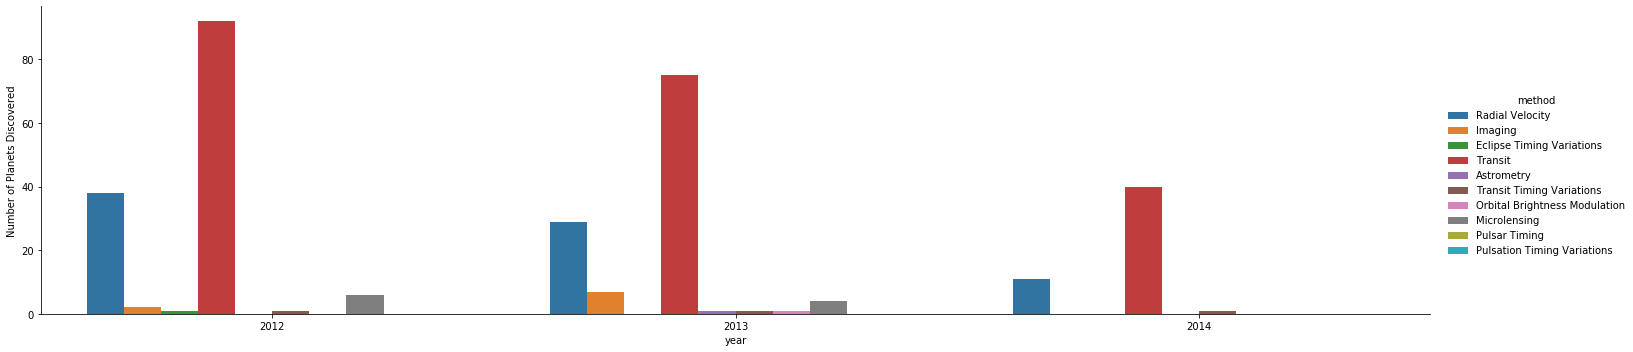

In [15]:
g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=[2012,2013,2014])
g.set_ylabels('Number of Planets Discovered')

# hue: color. each color represents a method of discovery.
# order = [2012,2013,2014], just show 3 years of values

In [16]:
#Q.7 It is a dataset from seaborn
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill'] # amount of tip as a percentage of the total bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


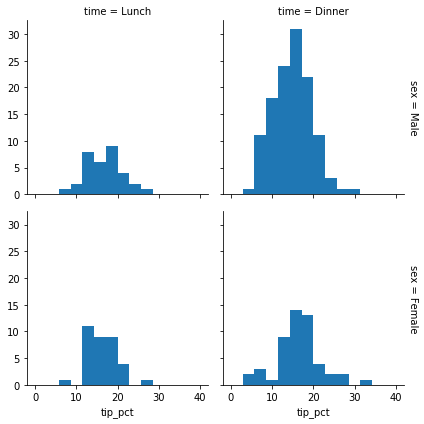

In [17]:
#Q.7
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
g.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))
# use FacetGrid to put plots into multiple rows and columns
# two rows for male and female
# two columns for two different meal times
# margin_titles=True, put titles at the margins
# .map() to map different plots into different rows and columns

In [18]:
#Q.8a
df = pd.read_csv("marathon-data.csv")
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [19]:
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [20]:
#8b
# first split the time into hours, minutes and seconds
# convert them into integers
df[["split_h","split_m","split_s"]] = df["split"].str.split(":",expand=True)
df[["split_h","split_m","split_s"]]=df[["split_h","split_m","split_s"]].astype(int)
df[["final_h","final_m","final_s"]] = df["final"].str.split(":",expand=True)
df[["final_h","final_m","final_s"]]=df[["final_h","final_m","final_s"]].astype(int)

In [21]:
# convert the times into seconds
df["split_sec"]=df["split_h"]*3600 + df["split_m"]*60 +df["split_s"] 
df["final_sec"]=df["final_h"]*3600 + df["final_m"]*60 +df["final_s"] 
df.drop(["split_h","split_m","split_s","final_h","final_m","final_s"], axis=1, inplace =True)

In [22]:
df.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938,7731
1,32,M,01:06:26,02:09:28,3986,7768
2,31,M,01:06:49,02:10:42,4009,7842
3,38,M,01:06:16,02:13:45,3976,8025
4,31,M,01:06:32,02:13:59,3992,8039


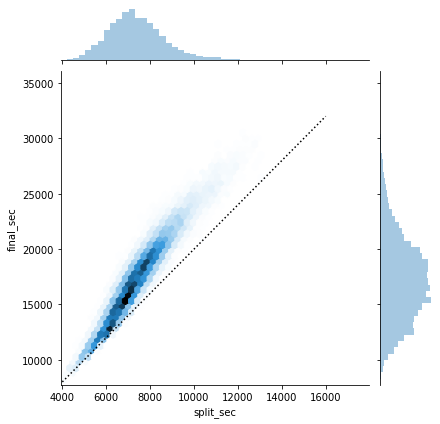

In [23]:
#8c
g = sns.jointplot("split_sec", "final_sec", df, kind="hex")
g.ax_joint.plot(np.linspace(4000, 16000),
        np.linspace(8000, 32000), ':k')

# create seaborn jointplot, the kind is hexogonal plot
# add a plot of straightline
#    x:numpy array from 4000 to 16000
#    y:numpy array from 8000 to 32000

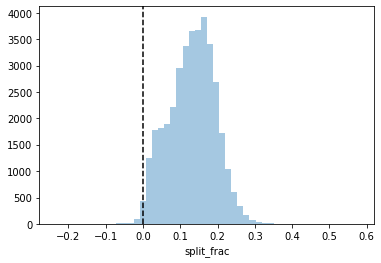

In [24]:
#8d
df["split_frac"] = 1 - 2*df["split_sec"]/df["final_sec"]
sns.distplot(df['split_frac'], kde=False)  # for seaborn, use distplot to plot a histogram
# kde = False, not to display the density curve.
plt.axvline(x=0, color="k", linestyle="--")
# plt vertical line at x=0

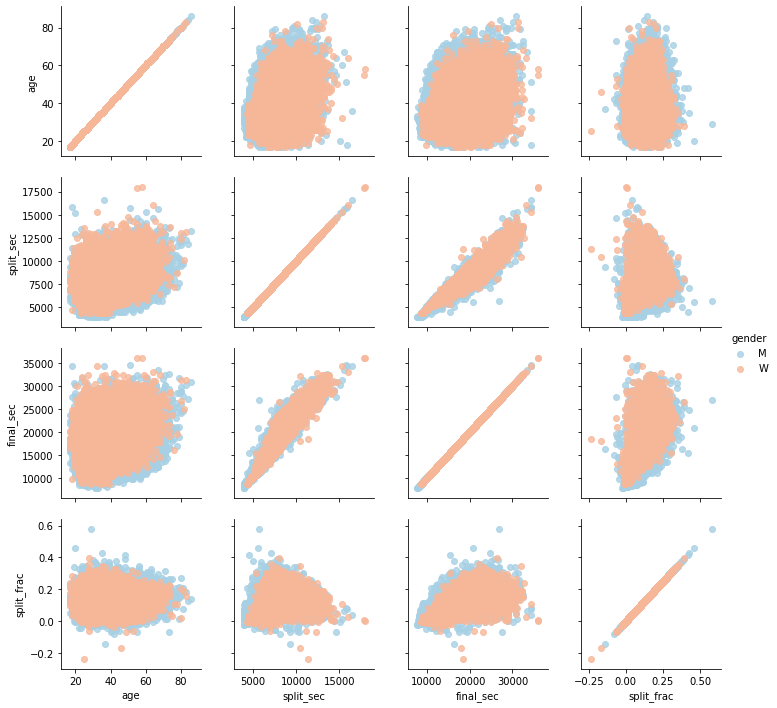

In [25]:
#8e
g = sns.PairGrid(df, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
# first we set up grid of pair plots. there are 4x4 pair plots
# hue: color, each color represents a gender.
# then, map the plots into the grid. we do scatter plots on the figure.

Text(0.5, 0, 'split_frac')

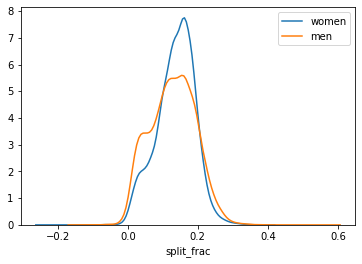

In [26]:
#8f
sns.distplot(df["split_frac"][df["gender"]=='W'], hist=False, label='women')
sns.distplot(df["split_frac"][df["gender"]=='M'], hist=False, label='men')
plt.xlabel('split_frac')
# do a distplot for women and then a distplot for men. 
# histograms are not displayed, just the density plot.

In [27]:
#8g
df['age_group'] = df["age"]//10*10
df.head()
# first create the column "age_group"

,age,gender,split,final,split_sec,final_sec,split_frac,age_group
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,30
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,30
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,30
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,30
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,30


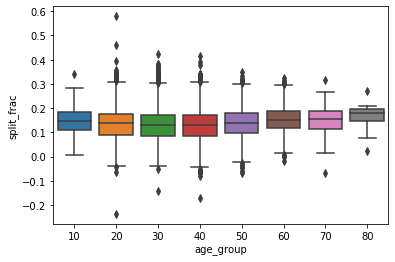

In [28]:
sns.boxplot(x="age_group", y="split_frac", data=df)
# create a box plot to show the variations of "split_frac" of different age groups

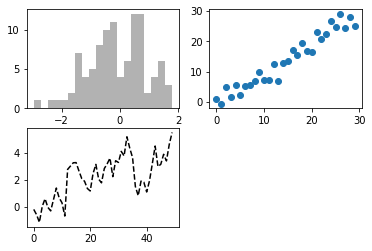

In [29]:
#Q.9
# first create a figure using plt.figure()
# then add an ax to the figure (each ax contains a plot)
# e.g., ax2 (2 rows, 2 columns, ax2 is at the first row and second column.)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

In [40]:
#10(a)
mpg = pd.read_csv("mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


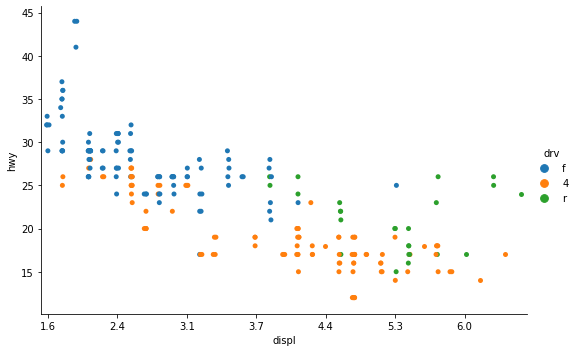

In [41]:
g = sns.catplot(x="displ", y="hwy", data=mpg, hue="drv", aspect=1.5)
# aspect = 1.5, width:length = 1:1.5
# different drv marked by different hues (colors).
g.set_xticklabels(step=5)

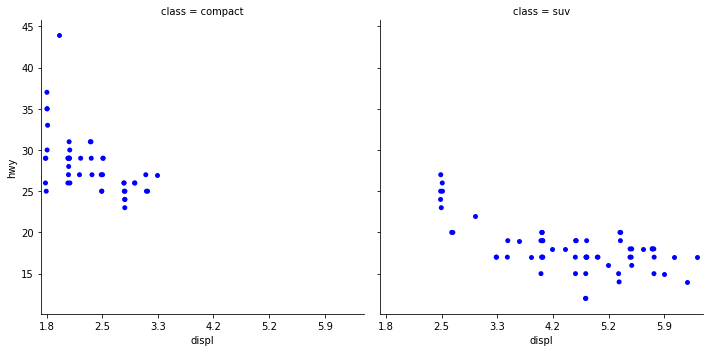

In [42]:
#10b
g=sns.catplot(data=mpg[(mpg["class"]=="suv")|(mpg["class"]=="compact")], x='displ', y='hwy', col="class", color="blue")
g.set_xticklabels(step=5)
# first filter the dataset and retain only class=="suv" or class=="compact"
# we have two plots, each column for a "class"

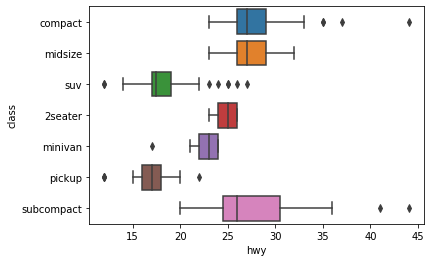

In [43]:
#10c
sns.boxplot(y="class", x="hwy",orient="h", data=mpg)
# use orient ="h", to have a horizontal orientation

In [67]:
#11a
df = pd.read_csv('world_cities_pop.csv',dtype = {'Region': np.str})
df.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [68]:
df.dtypes   # the dtype of "Region" is string.

Country        object
City           object
AccentCity     object
Region         object
Population    float64
Latitude      float64
Longitude     float64
dtype: object

In [69]:
#11b
# to create a geoplot, we need to have the columns "lon" and "lat"
df['lat'] = df['Latitude']

df['lon'] = df['Longitude']
# we are now ready for the first geoplot.

In [70]:
import geoplotlib
geoplotlib.dot(df)
geoplotlib.show()

In [71]:
#11c
df.dropna(subset=["Population"], inplace=True)
df["Population"].isnull().any()

False

In [72]:
#11d
df=df[df['Population'] >= 100_000]
geoplotlib.dot(df)
geoplotlib.show()